<a href="https://colab.research.google.com/github/mithilreddy369/Heart-Disease-Prediction-Using-Stacking-SMOTE-and-Deep-Learning/blob/main/Heart_Disease_Prediction_Using_Stacking%2C_SMOTE%2C_and_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 Data Collection**


In [ ]:
import pandas as pd

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **2 Data Preprocessing**



In [ ]:
# Check for missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Data types of each column
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
# Descriptive statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


# **3 Handling Class Imbalance**



Class distribution before SMOTE:
target
1    526
0    499
Name: count, dtype: int64


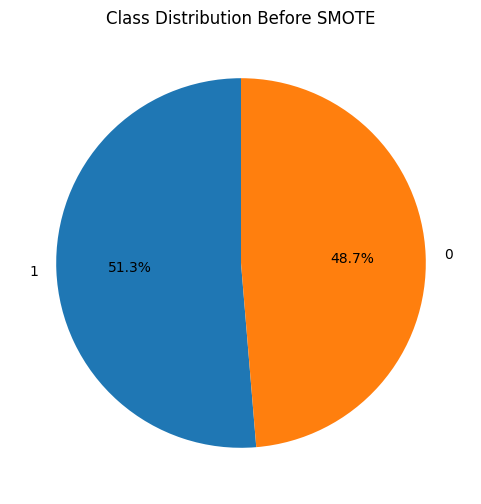


Class distribution after SMOTE:
target
0    526
1    526
Name: count, dtype: int64


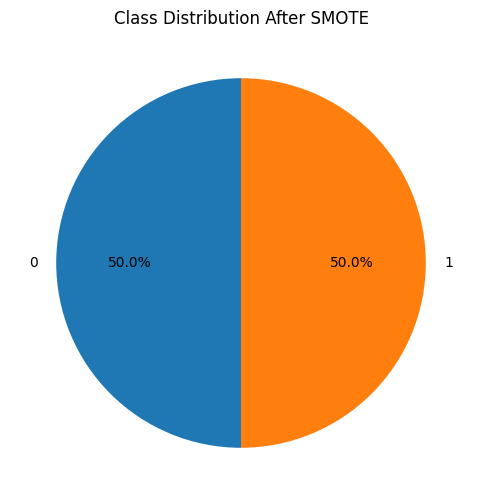

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Assuming 'target' is the column containing your target variable
target_column = 'target'  # Replace with your actual target column name

# Class distribution before SMOTE
class_counts_before = df[target_column].value_counts()
print("Class distribution before SMOTE:")
print(class_counts_before)

plt.figure(figsize=(6, 6))
plt.pie(class_counts_before, labels=class_counts_before.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution Before SMOTE')
plt.show()


# Apply SMOTE
smote = SMOTE(random_state=42)  # You can adjust random_state
X = df.drop(target_column, axis=1)
y = df[target_column]
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled[target_column] = y_resampled

# Class distribution after SMOTE
class_counts_after = df_resampled[target_column].value_counts()
print("\nClass distribution after SMOTE:")
print(class_counts_after)

plt.figure(figsize=(6, 6))
plt.pie(class_counts_after, labels=class_counts_after.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution After SMOTE')
plt.show()


# **4 Model Building**


In [ ]:
from sklearn.model_selection import train_test_split

target_column = 'target'  # Change to actual target column name
X = df_resampled.drop(target_column, axis=1).values  # Features
y = df_resampled[target_column].values  # Target variable

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Print the shapes of the resulting sets
print("\nShapes of the training and testing sets:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



Shapes of the training and testing sets:
X_train shape: (841, 13)
y_train shape: (841,)
X_test shape: (211, 13)
y_test shape: (211,)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# Reshape input data for LSTM, CNN, and RNN models
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#  Define Models
def build_lstm_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(64, return_sequences=True),
        layers.LSTM(32),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_cnn_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv1D(32, kernel_size=2, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(64, kernel_size=2, activation='relu'),
        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_rnn_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.SimpleRNN(64, return_sequences=True),
        layers.SimpleRNN(32),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_ann_model(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

#  Train Models
models = {
    "LSTM": build_lstm_model((X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    "CNN": build_cnn_model((X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    "RNN": build_rnn_model((X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    "ANN": build_ann_model(X_train.shape[1]),
}

# Train all models
for name, model in models.items():
    print(f"\nTraining {name} model...")
    if name == "ANN":
        model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))
    else:
        model.fit(X_train_reshaped, y_train, epochs=100, batch_size=16, validation_data=(X_test_reshaped, y_test))

# Generate Base Model Predictions
train_predictions = []
test_predictions = []
model_metrics = []

for name, model in models.items():
    if name == "ANN":
        test_pred = model.predict(X_test).flatten()
    else:
        test_pred = model.predict(X_test_reshaped).flatten()

    test_predictions.append(test_pred)  # Append predictions for stacking

    y_pred = (test_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)

    model_metrics.append([name, accuracy, precision[0], precision[1], recall[0], recall[1], f1[0], f1[1]])

# Convert to NumPy array
test_predictions = np.column_stack(test_predictions)

#  Meta-Learner (Logistic Regression)
meta_learner = LogisticRegression()
meta_learner.fit(test_predictions, y_test)
y_pred_meta = meta_learner.predict(test_predictions)

# Meta-Learner Metrics
accuracy = accuracy_score(y_test, y_pred_meta)
precision = precision_score(y_test, y_pred_meta, average=None)
recall = recall_score(y_test, y_pred_meta, average=None)
f1 = f1_score(y_test, y_pred_meta, average=None)
model_metrics.append(["Stacked-Model", accuracy, precision[0], precision[1], recall[0], recall[1], f1[0], f1[1]])

#  Display Metrics in Table Format
df_metrics = pd.DataFrame(model_metrics, columns=["Model", "Accuracy", "Precision (Class 0)", "Precision (Class 1)", "Recall (Class 0)", "Recall (Class 1)", "F1-Score (Class 0)", "F1-Score (Class 1)"])
df_metrics



Training LSTM model...
Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.5389 - loss: 0.6874 - val_accuracy: 0.6303 - val_loss: 0.6453
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6718 - loss: 0.6067 - val_accuracy: 0.8152 - val_loss: 0.4582
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7833 - loss: 0.4762 - val_accuracy: 0.8246 - val_loss: 0.4468
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7983 - loss: 0.4629 - val_accuracy: 0.8294 - val_loss: 0.4369
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7910 - loss: 0.4658 - val_accuracy: 0.8389 - val_loss: 0.4300
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7616 - loss: 0.5034 - val_accuracy: 0.8199 - val_loss: 0.4455
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7928 - loss: 0.4261 - val_accuracy: 0.8199 - val_loss: 0.4377
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7858 - loss: 0

,Model,Accuracy,Precision (Class 0),Precision (Class 1),Recall (Class 0),Recall (Class 1),F1-Score (Class 0),F1-Score (Class 1)
0,LSTM,0.909953,0.931034,0.895161,0.861702,0.948718,0.895028,0.921162
1,CNN,0.881517,0.905882,0.865079,0.819149,0.931624,0.860335,0.897119
2,RNN,0.957346,0.988506,0.935484,0.914894,0.991453,0.950276,0.962656
3,ANN,0.834123,0.904110,0.797101,0.702128,0.940171,0.790419,0.862745
4,Stacked-Model,0.971564,0.988889,0.958678,0.946809,0.991453,0.967391,0.974790


# **5 Model Evaluation**

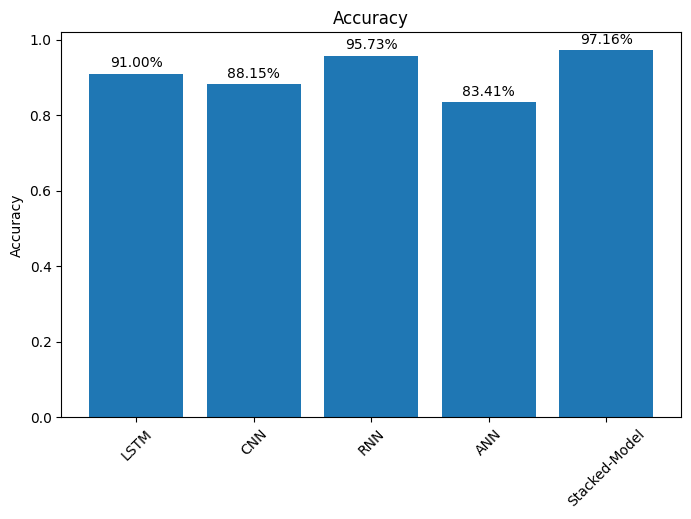

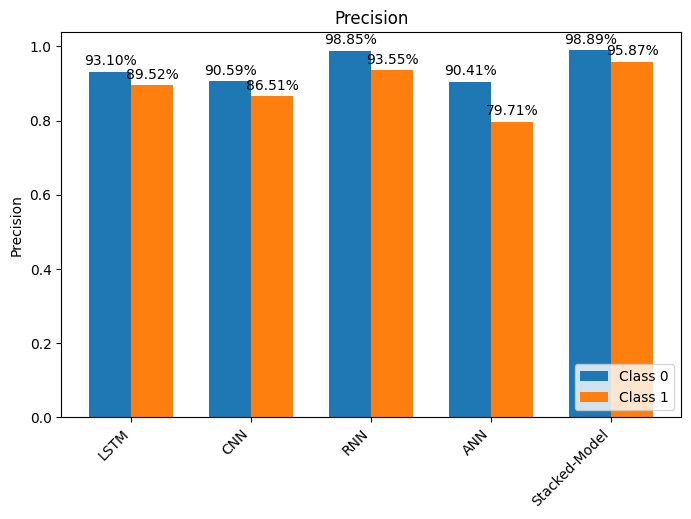

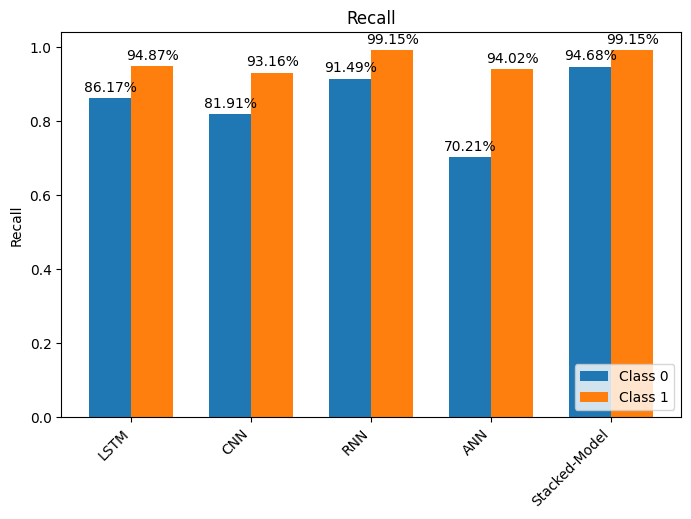

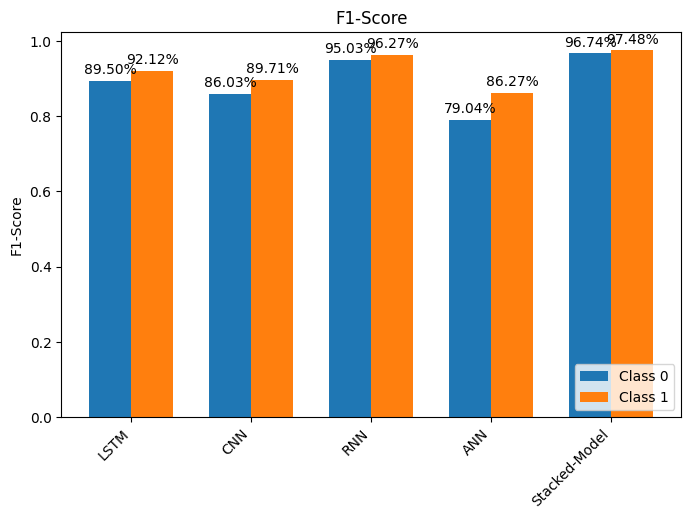

In [ ]:
#  Accuracy Chart
plt.figure(figsize=(8, 5))
plt.bar(df_metrics["Model"], df_metrics["Accuracy"])
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)

for i, v in enumerate(df_metrics["Accuracy"]):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center', va='bottom')

plt.show()

#  Plot Metrics
metrics = ["Precision", "Recall", "F1-Score"]
for metric in metrics:
    plt.figure(figsize=(8, 5))
    bar_width = 0.35
    x_pos = np.arange(len(df_metrics["Model"]))

    plt.bar(x_pos - bar_width/2, df_metrics[f"{metric} (Class 0)"], bar_width, label='Class 0')
    plt.bar(x_pos + bar_width/2, df_metrics[f"{metric} (Class 1)"], bar_width, label='Class 1')

    plt.title(metric)
    plt.ylabel(metric)
    plt.xticks(x_pos, df_metrics["Model"], rotation=45, ha="right")
    plt.legend(loc='lower right')

    for i, v in enumerate(df_metrics[f"{metric} (Class 0)"]):
        plt.text(i - bar_width/2, v + 0.01, f"{v:.2%}", ha='center', va='bottom')
    for i, v in enumerate(df_metrics[f"{metric} (Class 1)"]):
        plt.text(i + bar_width/2, v + 0.01, f"{v:.2%}", ha='center', va='bottom')

    plt.show()



# **6 Conclusion**

The Stacked-Model outperforms all other models, achieving the highest accuracy (97.16%) and F1-scores for both classes, indicating strong overall performance. The RNN follows closely with 95.73% accuracy. While LSTM and CNN perform well, they lag behind in recall and F1-score. ANN has the lowest accuracy (83.41%) and struggles with recall, making it the weakest performer. Overall, the Stacked-Model is the best choice for this classification task.

In [ ]:
import joblib

# Save each model individually
for name, model in models.items():
    filename = f"{name}_model.pkl"  # Choose appropriate filenames
    joblib.dump(model, filename)
    print(f"Saved {name} model to {filename}")

# Save the stacked
filename = "stacked_model.pkl"
joblib.dump(meta_learner, filename)
print(f"Saved meta-learner model to {filename}")


Saved LSTM model to LSTM_model.pkl
Saved CNN model to CNN_model.pkl
Saved RNN model to RNN_model.pkl
Saved ANN model to ANN_model.pkl
Saved meta-learner model to stacked_model.pkl


**Individual predictions**

In [ ]:
import numpy as np
import joblib

# Load the saved models
models = {}
for model_name in ["LSTM", "CNN", "RNN", "ANN"]:
    filename = f"{model_name}_model.pkl"
    models[model_name] = joblib.load(filename)

meta_learner = joblib.load("stacked_model.pkl")

# Example input features (replace with your actual input)
new_input = np.array([[58,	0,	0,	100,	248,	0,	0,	122,	0,	1,	1,	0,	2]])

# Preprocess the new input (if necessary - mirror training preprocessing)

# Reshape input for LSTM, CNN, RNN
new_input_reshaped = new_input.reshape(new_input.shape[0], new_input.shape[1], 1)


# Generate predictions from individual models
individual_predictions = []
for name, model in models.items():
    if name == "ANN":
      pred = model.predict(new_input).flatten()
    else:
      pred = model.predict(new_input_reshaped).flatten()
    individual_predictions.append(pred)

# Stack the predictions
stacked_input = np.column_stack(individual_predictions)

# Make a prediction using the stacked model
final_prediction = meta_learner.predict(stacked_input)

print("Final prediction (Stacked Model):", final_prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Final prediction (Stacked Model): [1]
